**Our Dataset is EV Charging Station Usage. We have 33 features and 259415 instances.**

- **Description of features:**

1. **Station Name**: The name or identifier of the station where Electric Vehicle is charging.

2. **MAC Address**: The Media Access Control (MAC) address of the equipment or device used for the charging. This is a unique identifier for networked devices.

3. **Org Name**: The name of the organization or company associated with the charging station.

4. **Start Date**: The date when the charging is started.

5. **Start Time Zone**: The time zone in which the charging is started.

6. **End Date**: The date when the charging ended.

7. **End Time Zone**: The time zone in which the charging ended.

8. **Transaction Date (Pacific Time)**: The date and time of the transaction in Pacific Time Zone, which might differ from the start and end times.

9. **Total Duration (hh:mm:ss)**: The total duration of the charging time in hours, minutes, and seconds.

10. **Charging Time (hh:mm:ss)**: The actual time the vehicle was connected to the charger, in hours, minutes, and seconds.

11. **Energy (kWh)**: The amount of energy consumed during the charging time, typically measured in kilowatt-hours (kWh).

12. **GHG Savings (kg)**: The amount of greenhouse gas (GHG) emissions saved as a result of using electric vehicle charging compared to a gasoline-powered vehicle, measured in kilograms (kg).

13. **Gasoline Savings (gallons)**: The amount of gasoline saved as a result of using electric vehicle charging, measured in gallons.

14. **Port Type**: The type of charging port used for the EV charging, such as Level 1, Level 2, or DC fast charging.

15. **Port Number**: The specific port or connector number at the charging station where the vehicle was connected.

16. **Plug Type**: The type of plug or connector used by the electric vehicle to connect to the charging station.

17. **EVSE ID**: The Electric Vehicle Supply Equipment (EVSE) ID, a unique identifier for the charging station equipment.

18. **Address 1**: The first line of the address where the charging station is located.

19. **City**: The city where the charging station is located.

20. **State/Province**: The state or province where the charging station is located.

21. **Postal Code**: The postal code or ZIP code of the charging station's location.

22. **Country**: The country where the charging station is located.

23. **Latitude**: The latitude coordinate of the charging station's location.

24. **Longitude**: The longitude coordinate of the charging station's location.

25. **Currency**: The currency used for pricing or fees associated with the charging event.

26. **Fee**: The fee charged for the charging service, if applicable.

27. **Ended By**: The entity or person who ended the charging session.

28. **Plug In Event Id**: An identifier for the specific plug-in event.

29. **Driver Postal Code**: The postal code of the driver's location.

30. **User ID**: An identifier for the user or driver of the electric vehicle.

31. **County**: The county where the charging station is located.

32. **System S/N**: The serial number of the charging system or equipment.

33. **Model Number**: The model number of the charging equipment or station.

Imported Libraries used for plotting, EDA, preprocessing etc.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EVChargingStationUsage.csv')
df.head()

C:\Users\dhair\AppData\Local\Temp\ipykernel_27320\143297901.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


Checking for the null values in the dataset

In [3]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

## 1. Preprocessing and Cleaning

In [4]:
df.drop(columns=['Org Name', 'Transaction Date (Pacific Time)', 'City', 'State/Province', 'Country', 'Ended By', 'Plug In Event Id', 'County', 'Driver Postal Code', 'System S/N'], inplace=True)

In [5]:
df.shape

(259415, 23)

In [6]:
df['Model Number'].fillna(0, inplace=True)
df['EVSE ID'].fillna(0, inplace=True)

Here we have dropped instances with NaN values in it.

In [7]:
df = df.dropna()

It creates new column Total Duration (hh:mm:ss) in the Dataframe to Pandas Dataframe Data type. Similarly Total Duration (seconds) column in created.

In [8]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Total Duration (hh:mm:ss)'], inplace=True)

It creates Charging Time (hh:mm:ss) and Charging Time(seconds) column into Pandas Timedelta Data Type.

In [9]:
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Charging Time (hh:mm:ss)'], inplace=True)

It converts values in the features into Pandas DataType.

In [10]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['Start Time'] = df['Start Date'].dt.strftime('%H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M',errors='coerce')
df['End Time'] = df['End Date'].dt.strftime('%H:%M')

We have imported preprocessing module from sklearn and it maps the unique station names to integer values. These mappings are stored using LabelEncoder.

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(list(df['Station Name']))
df['Station_cat'] = df['Station Name'].apply(lambda x: le.transform([x])[0]+1)

In [12]:
le.fit(list(df['Plug Type']))
df['Plug Type_cat'] = df['Plug Type'].apply(lambda x: le.transform([x])[0]+1)

In [13]:
le.fit(list(df['Port Type']))
df['Port Type_cat'] = df['Port Type'].apply(lambda x: le.transform([x])[0]+1)

## 2. EDA 

#### Number of Stations at a given Address

In [14]:
dist = df.groupby("Address 1")["Station Name"].nunique().reset_index()
dist.rename(columns={"Station Name": "Number of Stations"}, inplace=True)
dist

,Address 1,Number of Stations
0,1213 Newell Rd,3
1,1514 Walnut Dr,1
2,1520 Walnut Dr,2
3,250 Hamilton Ave,2
4,275 Cambridge Ave,4
5,350 Sherman Ave,11
6,358 Sherman Ave,2
7,3700 Middlefield Rd,6
8,400 Cambridge Ave,2
9,445 Bryant St,7


In [15]:
df.isnull().sum()

Station Name                   0
MAC Address                    0
Start Date                     0
Start Time Zone                0
End Date                      38
End Time Zone                  0
Energy (kWh)                   0
GHG Savings (kg)               0
Gasoline Savings (gallons)     0
Port Type                      0
Port Number                    0
Plug Type                      0
EVSE ID                        0
Address 1                      0
Postal Code                    0
Latitude                       0
Longitude                      0
Currency                       0
Fee                            0
User ID                        0
Model Number                   0
Total Duration (seconds)       0
Charging Time (seconds)        0
Start Time                     0
End Time                      38
Station_cat                    0
Plug Type_cat                  0
Port Type_cat                  0
dtype: int64

#### Boxplot

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

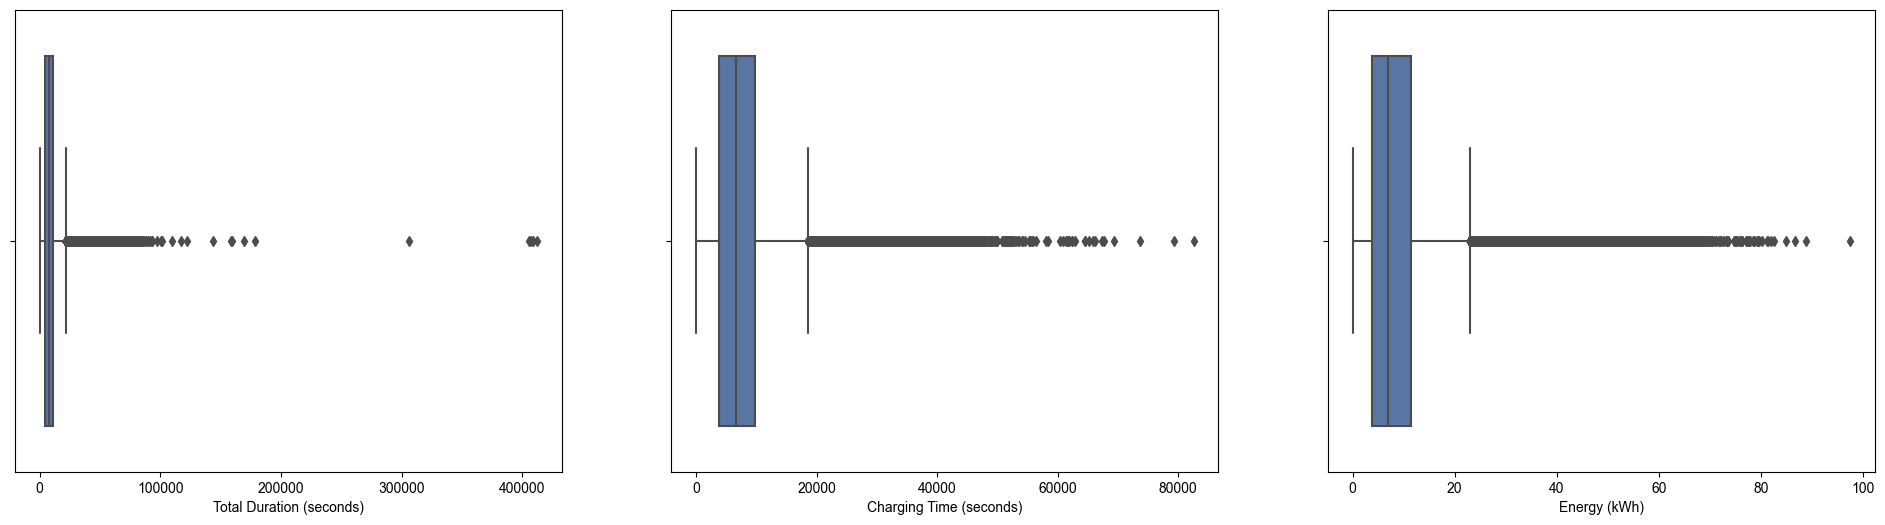

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total Duration (seconds)", "Charging Time (seconds)", "Energy (kWh)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

According to the boxplots above, charging times typically range from 0 to 20000 seconds, with all times above 20000 being anomalies.

Energy KWH ranges from 0 to 22 KWH, and all values above 22 are anomalous.

Additionally, a session's total duration might range from 0 to about 25000 seconds.

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


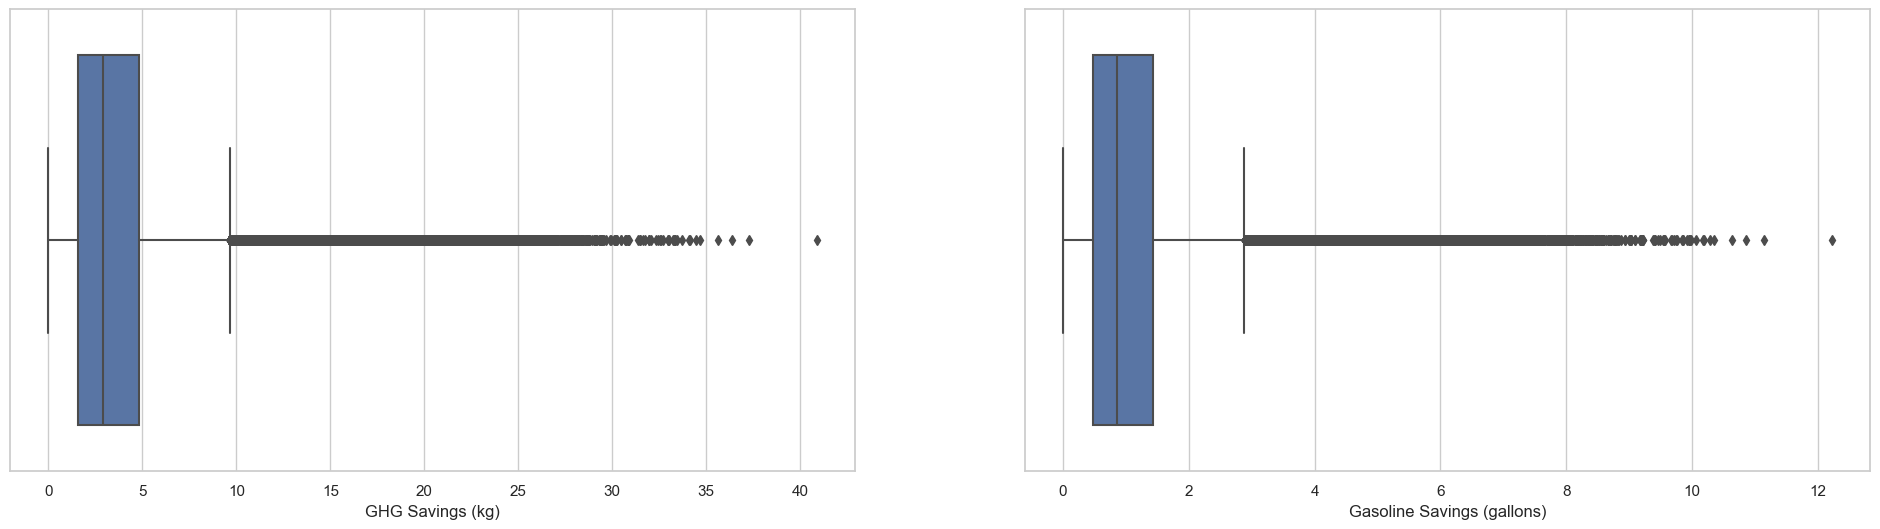

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["GHG Savings (kg)", "Gasoline Savings (gallons)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

According to the boxplots above, most GHG savings occur between 0 and 10 kg, with all savings above 10 kg being outliers.

Gasoline savings typically range from 0 to 3 gallons, with savings beyond 3 being exceptional.

#### Pie charts

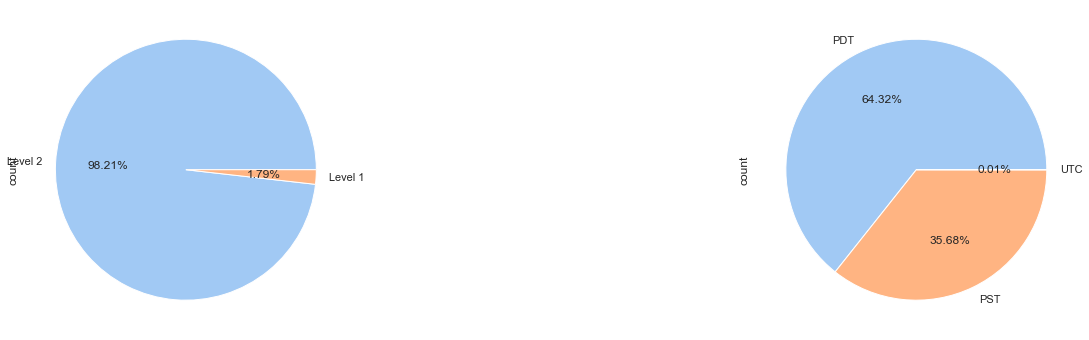

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["Port Type",""]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

In these pie graphs we can see that:
<br>
i) Majority of port types are of type 2
<br>
ii) Majority of start time zones are in PDT

#### Count plot

<AxesSubplot: xlabel='Fees', ylabel='count'>

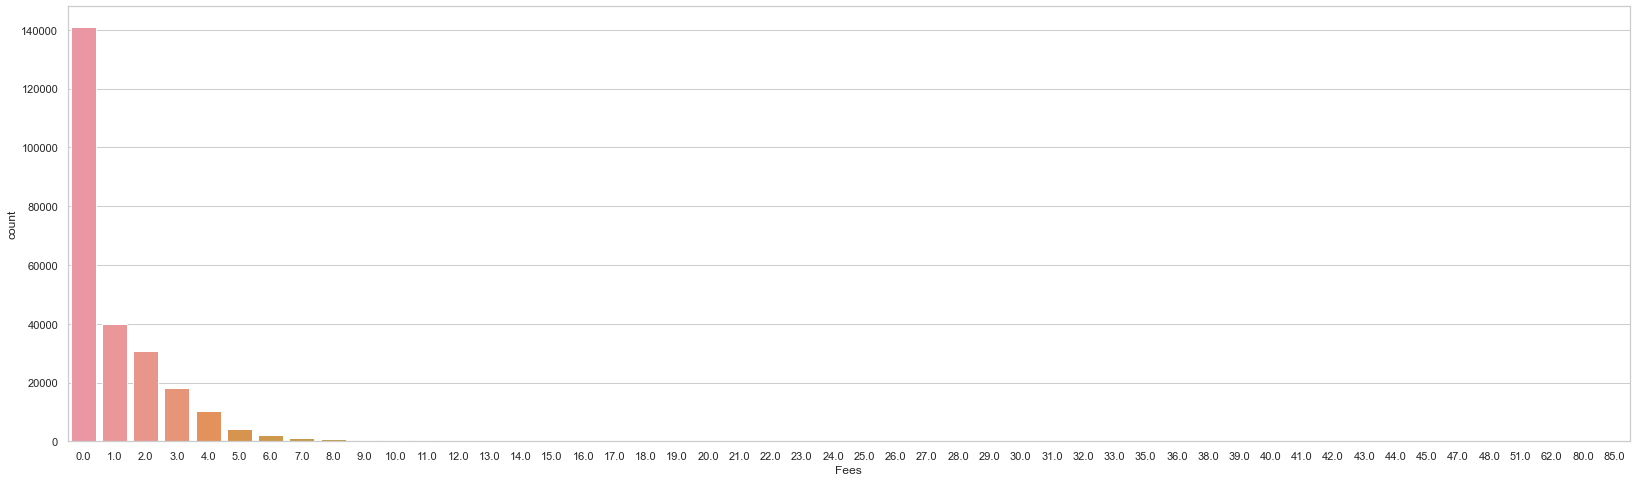

In [63]:
df["Fees"]=df["Fee"].round()
plt.figure(figsize=(28, 8))
sns.countplot(x="Fees",data=df)

The distribution of fees in the city is depicted by the above count-plot.
<br>
We can see that most of the EV Staions provide charging for free.

<AxesSubplot: xlabel='Plug Type', ylabel='count'>

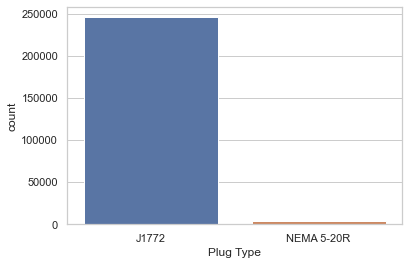

In [64]:
sns.countplot(x="Plug Type",data=df)

Majority of plug type are of type J1772 as seen from the above count-plot

#### Date vs Count plots

In [65]:
df["Start Date"] = pd.to_datetime(df["Start Date"])

In [66]:
df['Start Date (Date)'] = pd.to_datetime(df['Start Date']).dt.date
df['Start Date (Time)'] = pd.to_datetime(df['Start Date']).dt.time

In [67]:
df[["Start Date", "Start Date (Date)", "Start Date (Time)"]]

,Start Date,Start Date (Date),Start Date (Time)
0,2011-07-29 20:17:00,2011-07-29,20:17:00
1,2011-07-30 00:00:00,2011-07-30,00:00:00
2,2011-07-30 08:16:00,2011-07-30,08:16:00
3,2011-07-30 14:51:00,2011-07-30,14:51:00
4,2011-07-30 18:51:00,2011-07-30,18:51:00
...,...,...,...
259410,2020-12-31 16:39:00,2020-12-31,16:39:00
259411,2020-12-31 16:48:00,2020-12-31,16:48:00
259412,2020-12-31 17:28:00,2020-12-31,17:28:00
259413,2020-12-31 17:49:00,2020-12-31,17:49:00


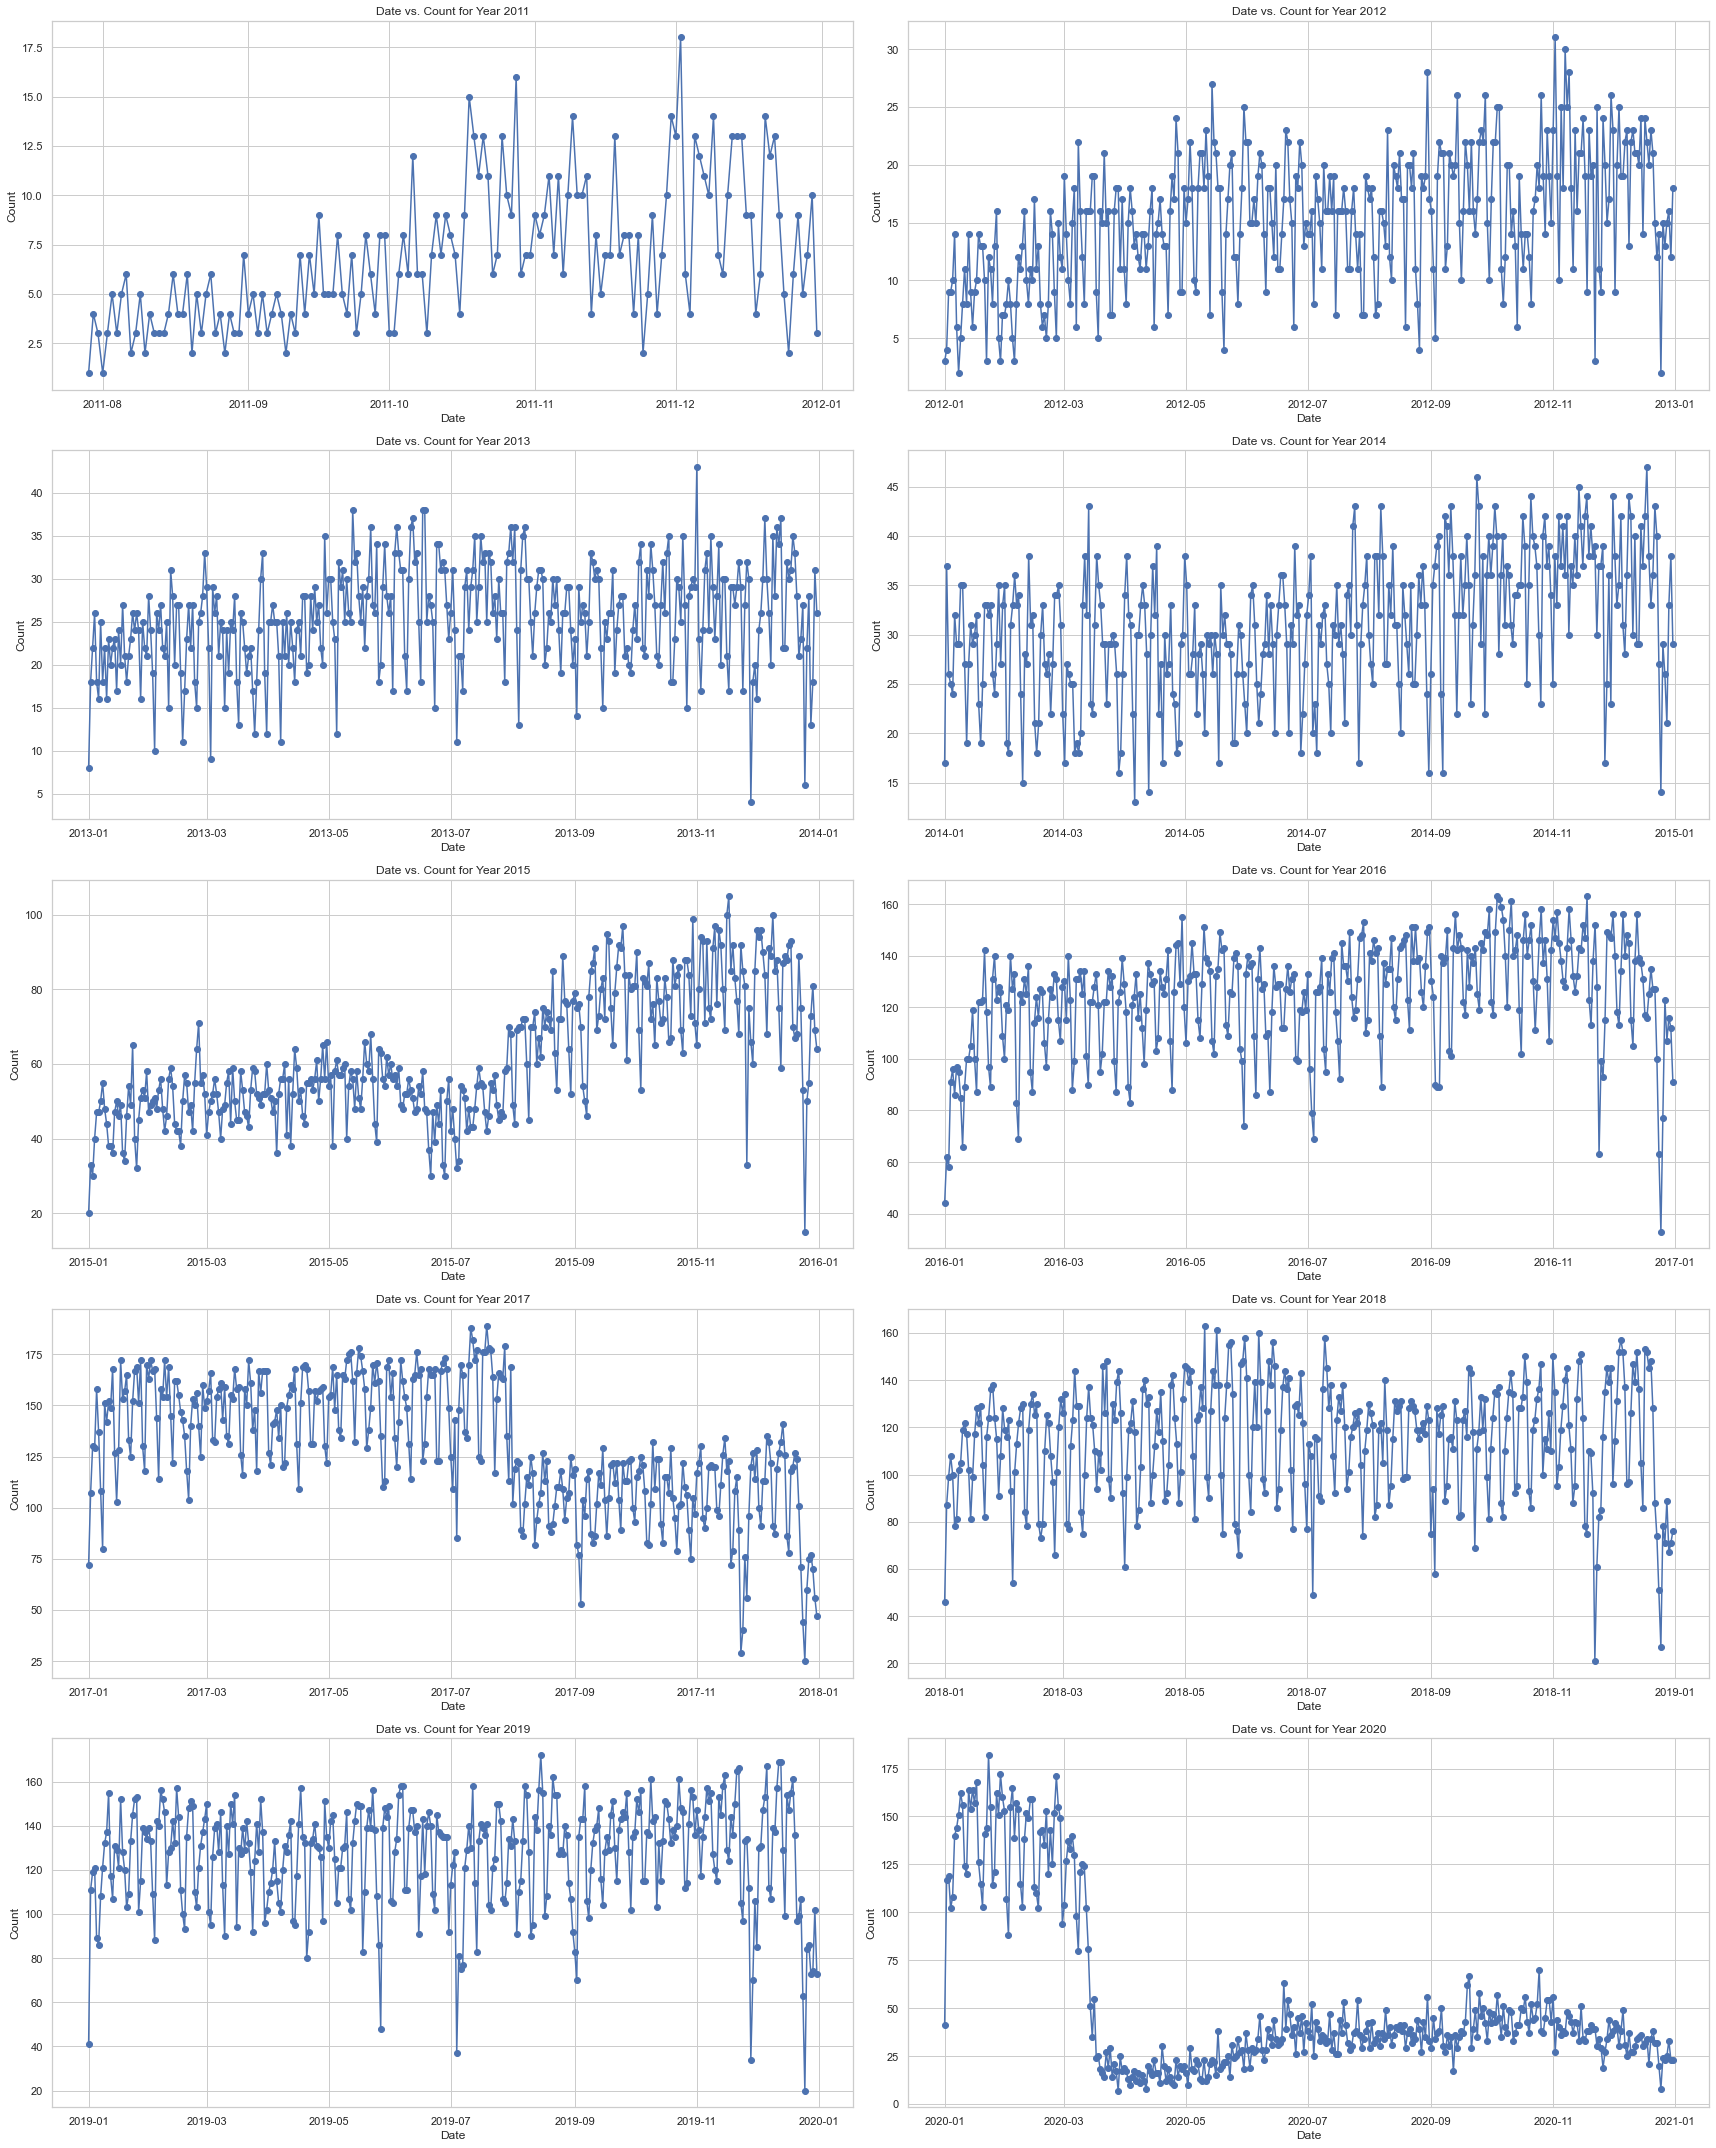

In [68]:
df["Start Date (Year)"] = df["Start Date (Date)"].apply(lambda x: x.year)
unique_years = df['Start Date (Year)'].unique()

fig, axes = plt.subplots(5, 2, figsize=(24, 30))

for i, year in enumerate(unique_years):
    row, col = divmod(i, 2)  
    ax = axes[row, col] 

    year_data = df[df["Start Date (Year)"] == year]
    date_counts = year_data.groupby('Start Date (Date)').size().reset_index(name='Count')

    ax.plot(date_counts['Start Date (Date)'], date_counts['Count'], marker='o', linestyle='-')
    ax.set_title(f'Date vs. Count for Year {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

In the above plots we can see the variation of EV Station utilisation for each year.

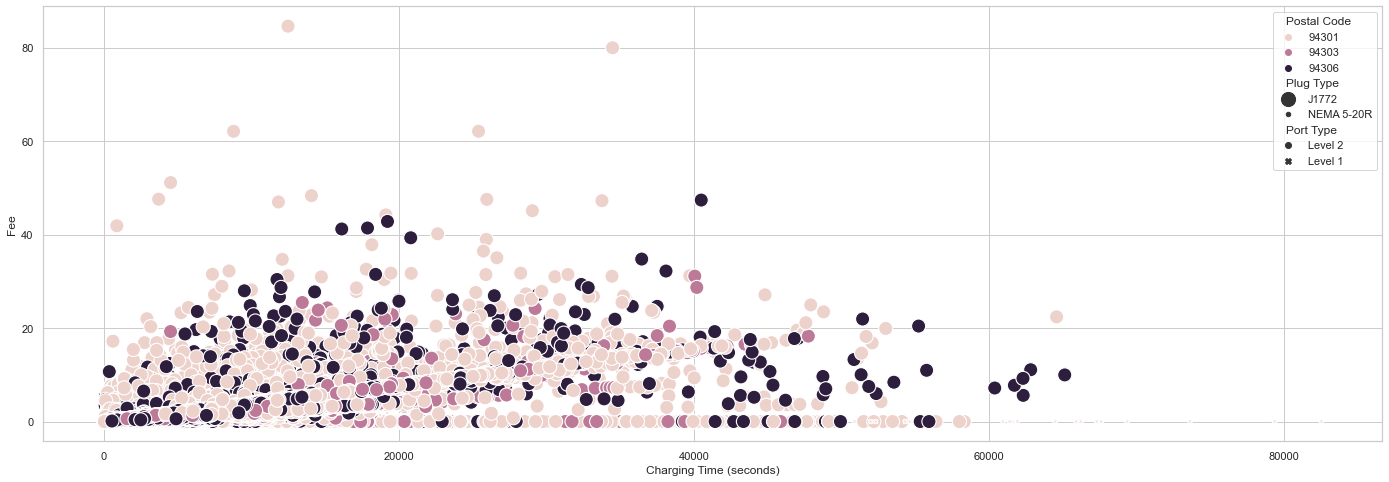

In [69]:
plt.figure(figsize=(24,8))
ax = sns.scatterplot(x=df["Charging Time (seconds)"], y=df["Fee"], hue=df["Postal Code"], size=df["Plug Type"], style=df["Port Type"], sizes=(20, 200), legend="full")

From this plot we can infer the relation between charging time,fee,port-type,plug-type and postal code.

We can see from above that at charging stations which are located 94301 postal code has less duration than 94303 and 94306.
And mostly J1772 plug type is used

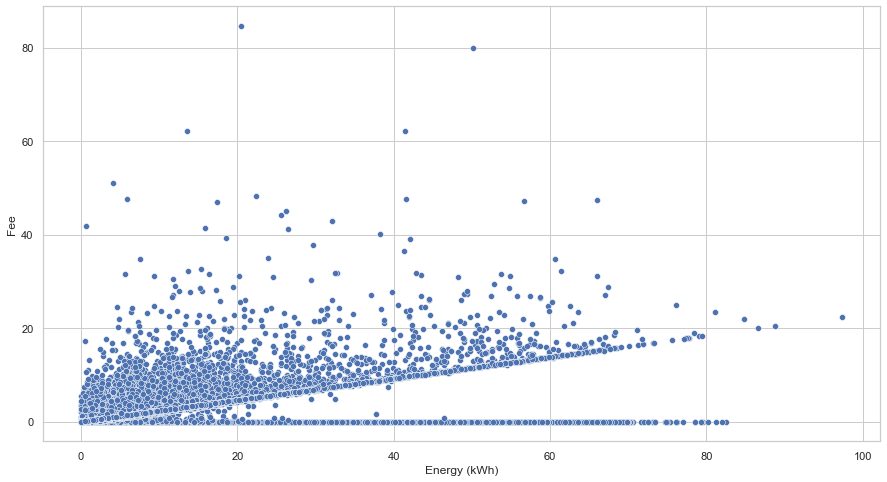

In [70]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y=df["Fee"], x=df["Energy (kWh)"])

We can see that the relation between energy and fee is almost linear except for some cases.

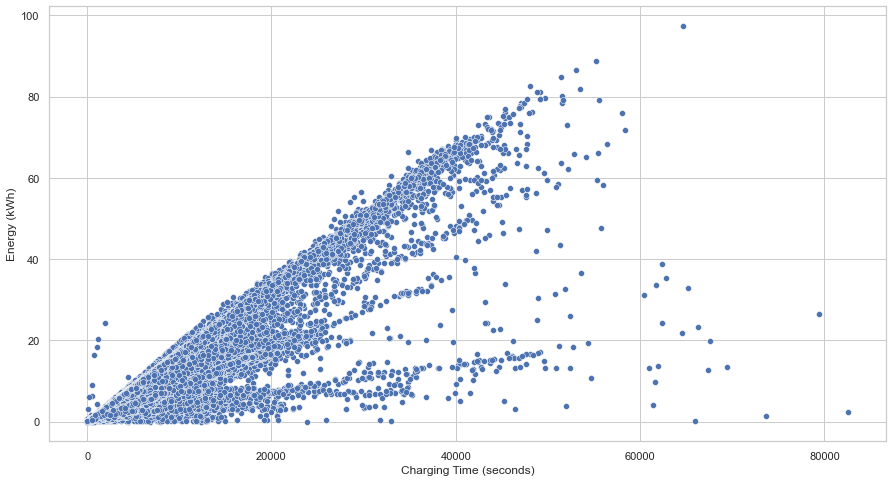

In [71]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Charging Time (seconds)"], y=df["Energy (kWh)"])

We can see that the relation between energy and charging time is almost linear except for some cases where energy is used less than the linear relation value.

In [72]:
df['Charging Time (hours)'] = df['Charging Time (seconds)'] / 3600
df_cnt_h=df['Charging Time (hours)'].value_counts()
df_cnt_h

Charging Time (hours)
1.415278     73
1.445833     71
1.426389     67
2.222222     66
2.068056     66
             ..
11.112222     1
6.214167      1
4.553611      1
13.334722     1
6.067778      1
Name: count, Length: 22168, dtype: int64

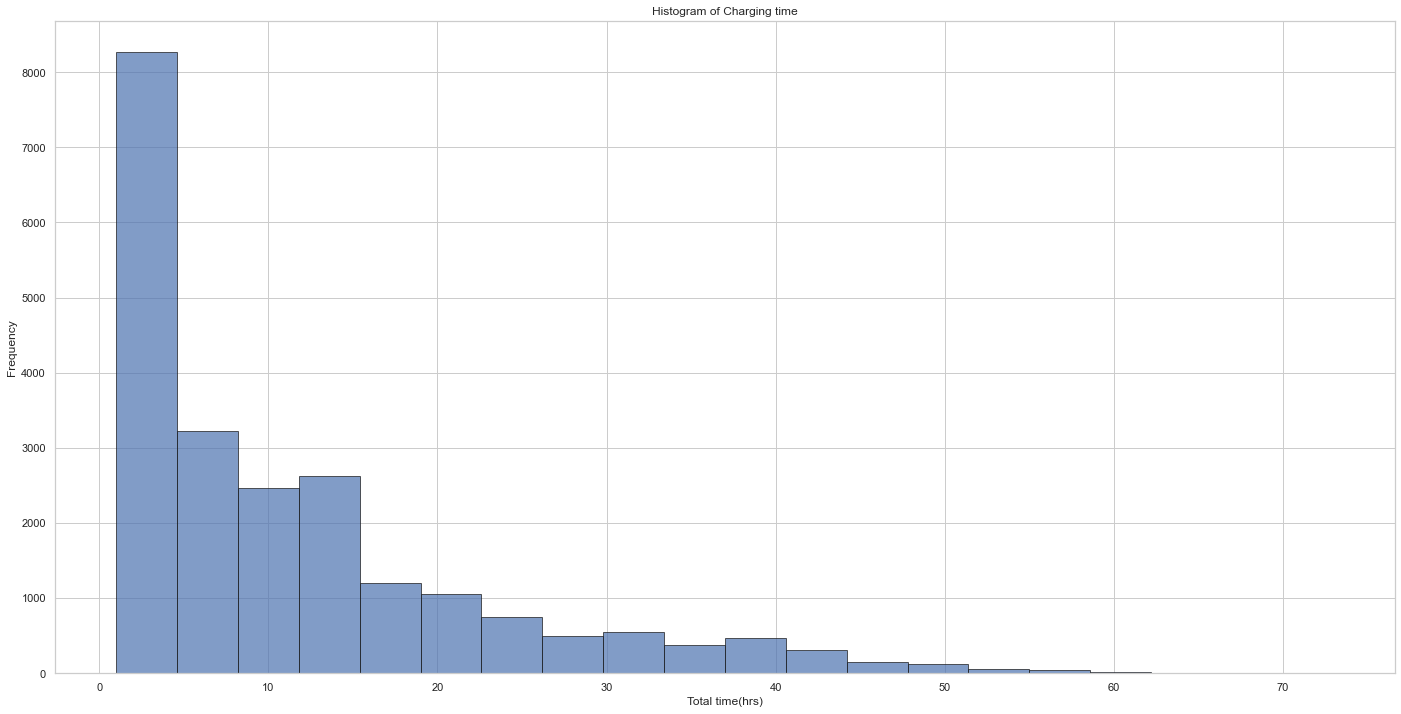

In [73]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Charging time(hrs)')
plt.ylabel('Frequency')
plt.title('Histogram of Charging time')
plt.show()

The above histogram show the frequency of charging times thoughout all stations

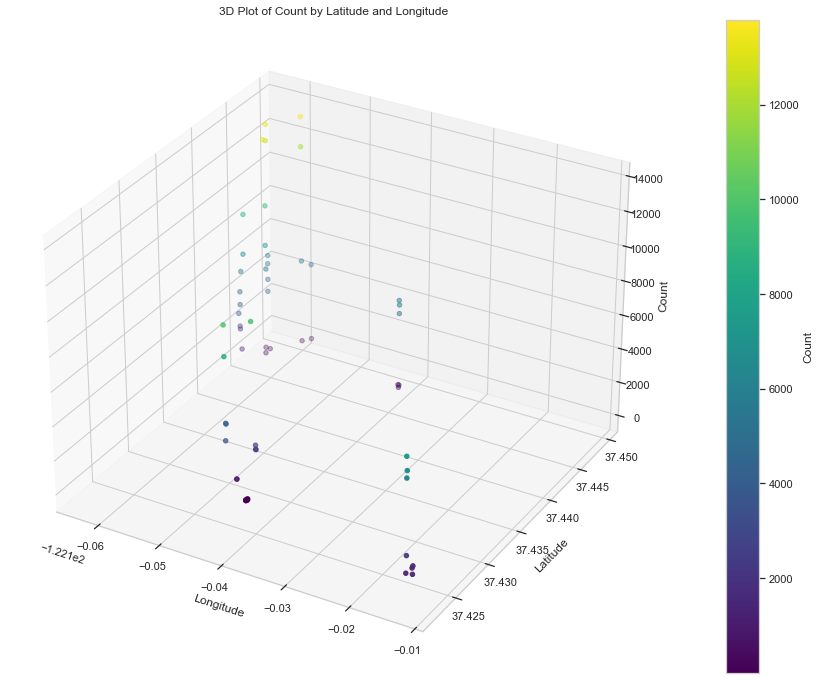

In [87]:
# Group data by Latitude and Longitude and sum the counts
grouped = df.groupby(['Latitude', 'Longitude']).size().reset_index(name = 'Count')

# Set up the figure and 3D axis
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(grouped['Longitude'], grouped['Latitude'], grouped['Count'], c=grouped['Count'], cmap='viridis')

# Customize the plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Count')
plt.title('3D Plot of Count by Latitude and Longitude')

# Add a colorbar to indicate count
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Show the plot
plt.show()

The above 3D plot shows the count of charging insatnces at each lattitude and longitude value pairs.
<br>
The businesses can see the area where there is more frequent usage of stations and can accordingly plan to open more stations.

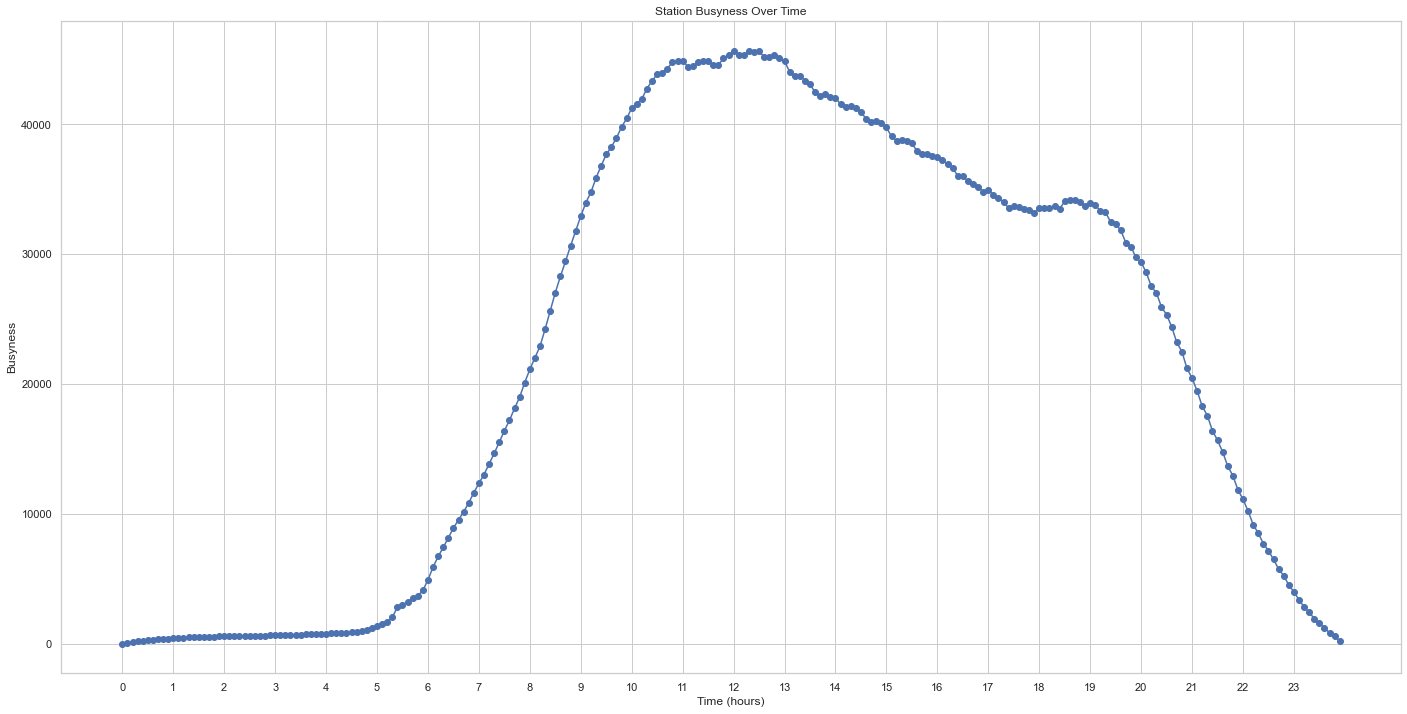

In [89]:
df['Start Time'] = df['Start Time'].astype(str)
df['End Time'] = df['End Time'].astype(str)

# Define a function to convert time strings to hours
def time_to_hours(time_str):
    if pd.notna(time_str) and ':' in time_str:
        hours, minutes = map(int, time_str.split(':'))
        return hours + minutes / 60
    else:
        return np.nan  

# Apply the time_to_hours function with error handling
df['Start Hour'] = df['Start Time'].apply(time_to_hours)
df['End Hour'] = df['End Time'].apply(time_to_hours)

# Create an array representing the 24-hour timeline
timeline = np.arange(0, 24, 0.1)  

# Calculate busyness for each time point on the timeline
busyness = []
for hour in timeline:
    active_uses = ((df['Start Hour'] <= hour) & (df['End Hour'] >= hour)).sum()
    busyness.append(active_uses)


plt.figure(figsize=(24, 12))
plt.plot(timeline, busyness, marker='o', linestyle='-', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Busyness')
plt.title('Station Busyness Over Time')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))  
plt.show()

The above graph shows the busyness at each hour of the day.
<br>
Using this businesses can get prime hours of the day in terms of busyness and can plan accordingly. 

#### Heatmap

<Axes: >

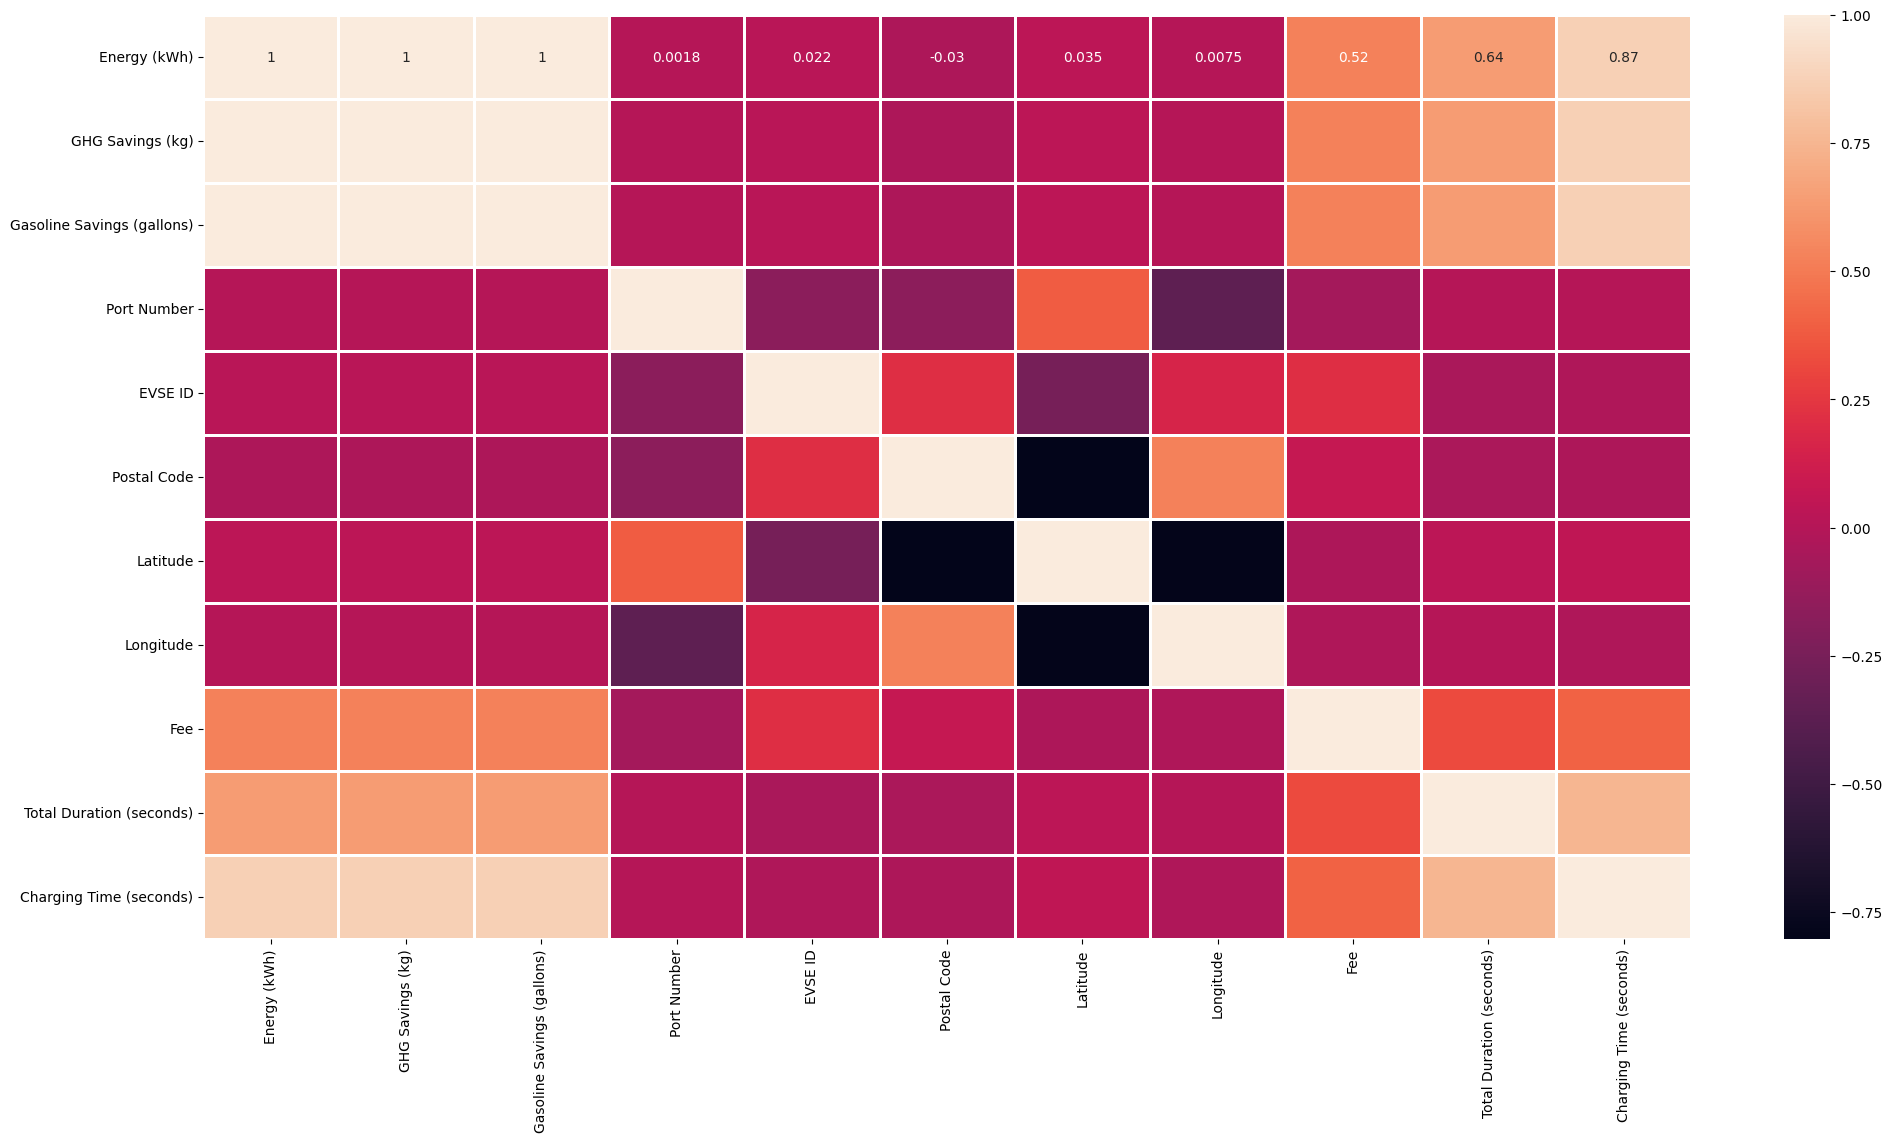

In [20]:
new_df = df[['Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Number', 'EVSE ID', 'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Total Duration (seconds)', 'Charging Time (seconds)']]
plt.figure(figsize=(24,12))
sns.heatmap(data=new_df.corr(), lw = 1, annot=True)

From above heatmap we can see the realtion between different features.
<br>
For example, Energy,GHG Saving and Gasoline Saving are correlated with correaltion value 1 which implies that they are nearly linearly propotional to each other.

## 3. Data Normalization and Standardization

#### GHG Saving prediction

In [22]:
data_df=df[["Station_cat","Port Type_cat","Plug Type_cat","Port Number","Energy (kWh)", "Charging Time (seconds)"]]


In [23]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["GHG Savings (kg)"], random_state=42, test_size=0.20)
size_scaler = preprocessing.StandardScaler().fit(X_train)

In [24]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

In [40]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'Ridge': {"model": Ridge(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [41]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    model_results['rScore'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        rScore = r2_score(y_test,y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params','rScore']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_,rScore]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.5815771337537914 {}
Ridge 1.58157710282422 {}
RandomForestRegressor 1.2239139571871824 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 1.27236862303771 {'learning_rate': 0.01, 'n_estimators': 510}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=510, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


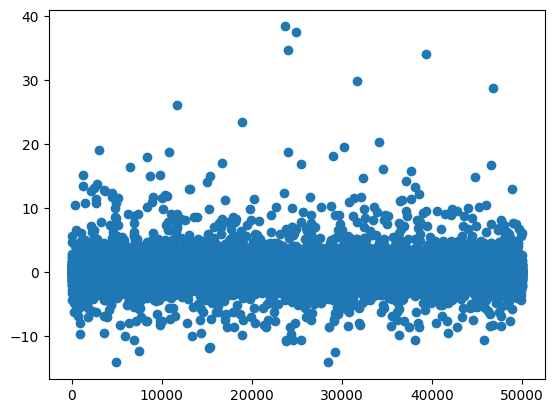

In [42]:
model_results = eval_models()

In [47]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,rScore
LinearRegression,1.581577,1.551678,1.001391,0.999488,{},0.324842
Ridge,1.581577,1.551678,1.001396,0.999492,{},0.324842
RandomForestRegressor,1.223914,1.261364,0.587989,0.597049,"{'max_depth': 9, 'n_estimators': 45}",0.553848
XGBRegressor,1.272369,1.251098,0.594163,0.596312,"{'learning_rate': 0.01, 'n_estimators': 510}",0.561081


#### Charging fee prediction

Now we are training models and defining the dependent features to predict Fee.

In [44]:
data_df=df[["Station_cat","EVSE ID","Port Type_cat","Plug Type_cat","Port Number","Energy (kWh)"]]

In [45]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Fee"], random_state=42, test_size=0.20)
size_scaler = preprocessing.StandardScaler().fit(X_train)

In [46]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [34]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'Ridge': {"model": Ridge(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

LinearRegression 1.5815771337537914 {}
Ridge 1.58157710282422 {}
RandomForestRegressor 1.2239139571871824 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 1.27236862303771 {'learning_rate': 0.01, 'n_estimators': 510}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=510, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


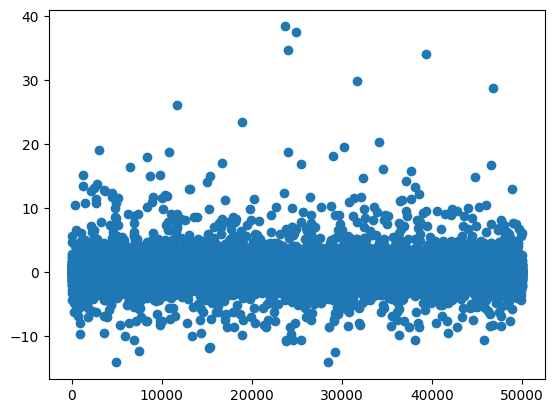

In [48]:
model_results = eval_models()

In [49]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,rScore
LinearRegression,1.581577,1.551678,1.001391,0.999488,{},0.324842
Ridge,1.581577,1.551678,1.001396,0.999492,{},0.324842
RandomForestRegressor,1.223914,1.261364,0.587989,0.597049,"{'max_depth': 9, 'n_estimators': 45}",0.553848
XGBRegressor,1.272369,1.251098,0.594163,0.596312,"{'learning_rate': 0.01, 'n_estimators': 510}",0.561081
